# Visualisation de données

L'analyse de données s'appuie souvent sur l'étude graphique des données. En fonction de la nature des données caractérisant les individus, à savoir qualitatives ou quantitatives, du nombre de variables décrivant les individus, nous en déduisons les graphiques associés.
Pour rappel :

* graphiques univariés pour une seule variable

  * variable qualitative : diagrammes de fréquence et diagrammes circulaires

  * variable quantitative : histogramme, box-plots, barrres de moyennes

* graphiques croisés pour plusieurs variables

  * entre deux variables quantitatives : nuage de points

  * entre une variable qualitative et une variable quantitative : histogrammes, box-plots

Référence : https://mpra.ub.uni-muenchen.de/76653/1/MPRA_paper_76653.pdf


In [1]:
# Chargement des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt

## Chargement des données

In [2]:
# création de la matrice de données
df = pd.read_csv("../data/WineDataSet.csv")
df = df.rename(columns=({
    'Column1':'Class',
    'Column2':'Alcohol',
    'Column3':'Malic_Acid',
    'Column4':'Ash',
    'Column5':'Ash_Alcalinity',
    'Column6':'Magnesium',
    'Column7':'Total_Phenols',
    'Column8':'Flavanoids',
    'Column9':'Nonflavanoid_Phenols',
    'Column10':'Proanthocyanins',
    'Column11':'Colour_Intensity',
    'Column12':'Hue',
    'Column13':'OD280/OD315_of_diluted_wines',
    'Column14':'Proline'
}))
df.head()
df.describe()

Class     Alcohol  Malic_Acid         Ash  Ash_Alcalinity  \
count  178.000000  178.000000  178.000000  178.000000      178.000000   
mean     1.938202   13.000618    2.336348    2.366517       19.494944   
std      0.775035    0.811827    1.117146    0.274344        3.339564   
min      1.000000   11.030000    0.740000    1.360000       10.600000   
25%      1.000000   12.362500    1.602500    2.210000       17.200000   
50%      2.000000   13.050000    1.865000    2.360000       19.500000   
75%      3.000000   13.677500    3.082500    2.557500       21.500000   
max      3.000000   14.830000    5.800000    3.230000       30.000000   

        Magnesium  Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Colour_Intensity         Hue  \
count       178.000000        178.000000  178.000000   
mean          1.590899          5.058090    0.957449   
std           0.572359          2.318286    0.228572   
min           0.410000          1.280000    0.480000   
25%           1.250000          3.220000    0.782500   
50%           1.555000          4.690000    0.965000   
75%           1.950000          6.200000    1.120000   
max           3.580000         13.000000    1.710000   

       OD280/OD315_of_diluted_wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

## Graphiques simples

Quelques [graphiques de base](http://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) utiles pour une exploration sommaire des données :

<AxesSubplot:>

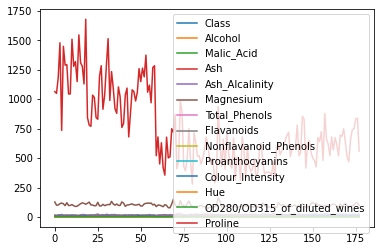

In [3]:
df.plot()

<AxesSubplot:>

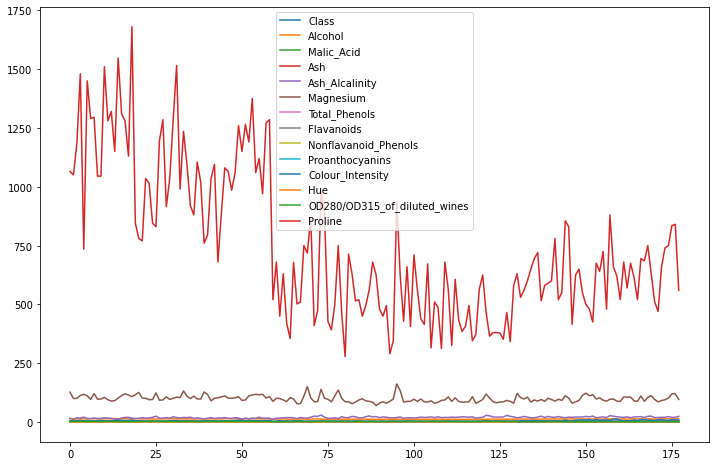

In [5]:
# le même graphique en plus grand
df.plot(figsize=(12, 8))

<AxesSubplot:>

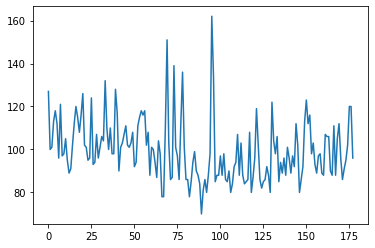

In [6]:
# Graphique sur une seule colonne (variable)
df.Magnesium.plot()
# Pareil ! df["Magnesium"].plot()

<AxesSubplot:>

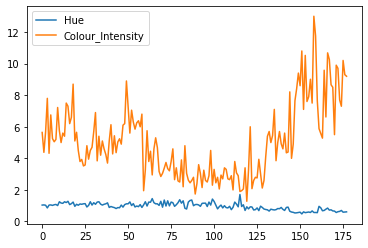

In [7]:
# Graphique sur plusieurs colonnnes
df[['Hue', 'Colour_Intensity']].plot()

<AxesSubplot:xlabel='Magnesium', ylabel='Colour_Intensity'>

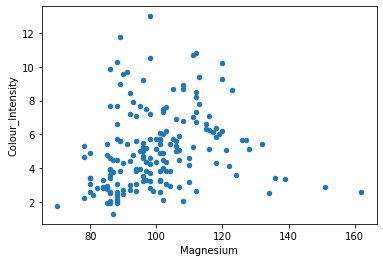

In [8]:
# Une variable en fonction d'une autre 
df.plot.scatter(x="Magnesium", y="Colour_Intensity")

<AxesSubplot:>

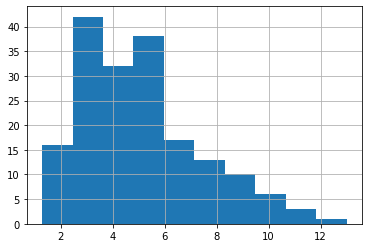

In [9]:
# Histogramme (distribution des valeurs) d'une colonne
df.Colour_Intensity.hist()

array([[<AxesSubplot:title={'center':'Hue'}>,
        <AxesSubplot:title={'center':'Colour_Intensity'}>],
       [<AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Proline'}>]], dtype=object)

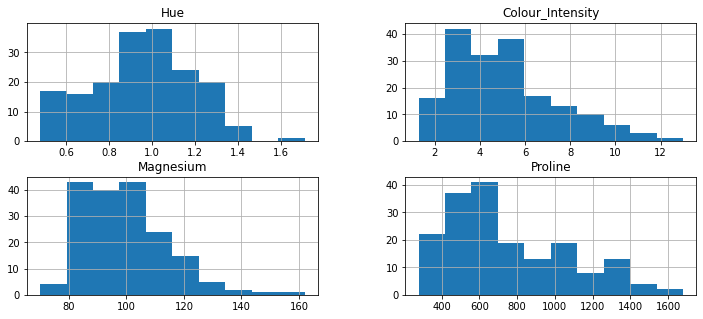

In [10]:
# Histogramme (distribution des valeurs) sur plusieurs colonnes
df[['Hue', 'Colour_Intensity', 'Magnesium', 'Proline']].hist(figsize=(12, 5))

<AxesSubplot:ylabel='Frequency'>

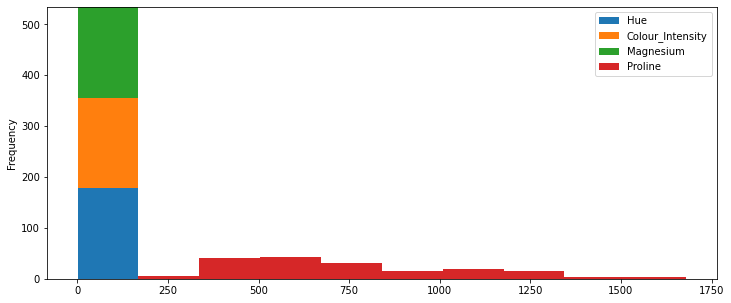

In [11]:
# Les histogrammes précédents sur le même graphique :
df[['Hue', 'Colour_Intensity', 'Magnesium', 'Proline']].plot.hist(stacked=True, figsize=(12, 5))

In [12]:
# Calcul de variables centrées-réduites
df['Hue2'] = (df.Hue-df.Hue.mean())/df.Hue.std()
df['Colour_Intensity2'] = (df.Colour_Intensity-df.Colour_Intensity.mean())/df.Colour_Intensity.std()
df['Magnesium2'] = (df.Magnesium-df.Magnesium.mean())/df.Magnesium.std()
df['Proline2'] = (df.Proline-df.Proline.mean())/df.Proline.std()
df[['Hue2', 'Colour_Intensity2', 'Magnesium2', 'Proline2']].head()

Hue2  Colour_Intensity2  Magnesium2  Proline2
0  0.361158           0.251009    1.908522  1.010159
1  0.404908          -0.292496    0.018094  0.962526
2  0.317409           0.268263    0.088110  1.391224
3 -0.426341           1.182732    0.928300  2.328007
4  0.361158          -0.318377    1.278379 -0.037767

In [13]:
# Check
print("La moyenne est de: ", df['Proline2'].mean())
print("L'écart type est de: ", df['Proline2'].std())

La moyenne est de:  -7.983626244495507e-17
L'écart type est de:  1.0


<AxesSubplot:ylabel='Frequency'>

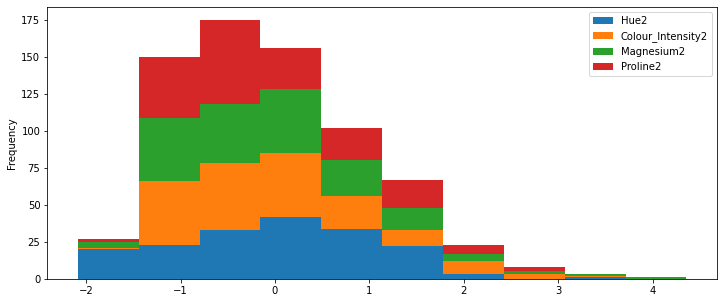

In [14]:
# Les histogrammes précédents sur le même graphique
df[['Hue2', 'Colour_Intensity2', 'Magnesium2', 'Proline2']].plot.hist(stacked=True, figsize=(12, 5))

### Barres verticales

On souhaite faire le graphique en barres verticales des moyennes sur 3 mesures (avec les écarts types)

In [15]:
# Création de la valeur moyenne pour les 3 mesures
mean_values = [df.Alcohol.mean(), df.Magnesium.mean(), df.Colour_Intensity.mean()]
mean_values

[13.00061797752809, 99.74157303370787, 5.058089882022472]

In [16]:
# Calcul des écarts type
ecarts_types = [df.Alcohol.values.std(), df.Magnesium.values.std(), df.Colour_Intensity.values.std()]

In [17]:
mean_values

[13.00061797752809, 99.74157303370787, 5.058089882022472]

In [18]:
ecarts_types

[0.8095429145285168, 14.242307673359806, 2.3117646609525573]

In [19]:
# on prend 1.96 ecart-type
ecarts_types_norm = [1.96*ec for ec in ecarts_types]
ecarts_types_norm

[1.586704112475893, 27.91492303978522, 4.531058735467012]

In [20]:
# Création des labels
bar_labels = ['Alcohol', 'Magnesium', 'Colour_Intensity']

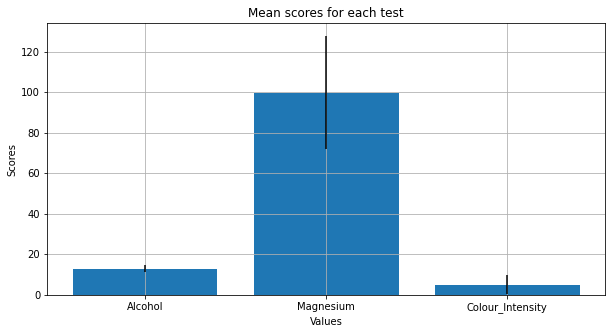

<Figure size 432x288 with 0 Axes>

In [21]:
# Récupération de l'objet figure et de l'objet axis
fig, ax = plt.subplots(figsize=(10,5))
# Création des valeurs de l'axe des abscisses
x_pos = list(range(len(bar_labels)))
# Création du graphique
plt.bar(x_pos, mean_values, yerr = ecarts_types_norm)
# ajouter des grilles
plt.grid()
# Nommer les axes
plt.ylabel("Scores")
plt.xlabel("Values")
# Labéliser chaque barre
plt.xticks(x_pos, bar_labels)
# Nommer le graphique
plt.title("Mean scores for each test")
# Affichage
plt.show()
# Sauvegarde
plt.savefig("histo1.png")

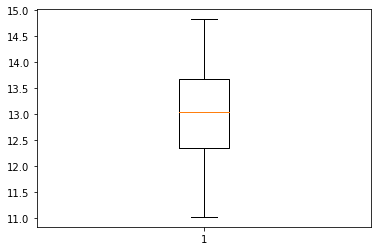

In [22]:
# Diagramme en boite
plt.boxplot(df.Alcohol.values)
plt.show()

In [23]:
# On norme les données pour pouvoir comparer leurs répartitions
data_norm = [(df.Alcohol.values-mean_values[0])/ecarts_types[0],(df.Magnesium.values-mean_values[1])/ecarts_types[1],(df.Colour_Intensity.values-mean_values[2])/ecarts_types[2]]

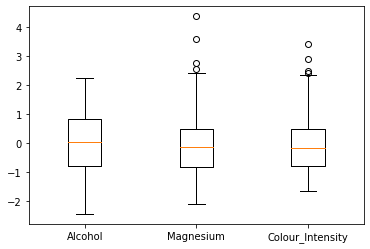

In [24]:
# Diagramme en boite groupés avec les données normalisées
plt.boxplot(data_norm)
# Labélisation 
x_pos = [1,2,3]
plt.xticks(x_pos, bar_labels)
# Affichage
plt.show()

## Barres horizontales

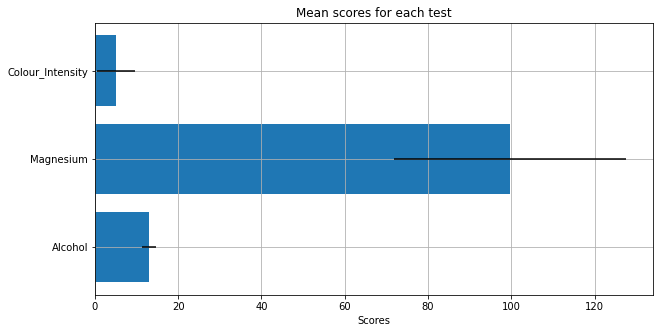

<Figure size 432x288 with 0 Axes>

In [25]:
# Récupération de l'objet figure et de l'objet axis
fig, ax = plt.subplots(figsize=(10,5))
# Création des valeurs de l'axe des abscisses
y_pos = list(range(len(bar_labels)))
# Création du graphique
plt.barh(y_pos, mean_values, xerr = ecarts_types_norm)
# ajouter des grilles
plt.grid()
# Nommer l'axe des x
plt.xlabel("Scores")
# Labéliser chaque barre
plt.yticks(y_pos, bar_labels)
# Nommer le graphique
plt.title("Mean scores for each test")
# Affichage
plt.show()
#Sauvegarde
plt.savefig('histo2.png')

## Définition et paramètrage de graphiques en plusieurs cadrans

<AxesSubplot:>

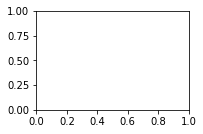

In [26]:
plt.subplot(221)

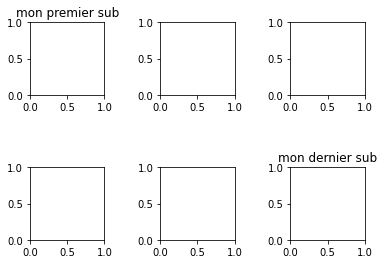

In [27]:
fig = plt.figure()
# 6 sous-graphiques : 2*3
fig.add_subplot(231)
plt.title('mon premier sub')
fig.add_subplot(232)
fig.add_subplot(233)
fig.add_subplot(234)
fig.add_subplot(235)
fig.add_subplot(236)
plt.title('mon dernier sub')
# Réglage des espaces horizontaux et verticaux entre les sous-graphiques
plt.subplots_adjust(hspace=1, wspace=0.75)
plt.show()


In [28]:
# Nous souhaitons récupérer les 5 premiers individus avec les variables Magnesium, Alcohol et Colour_Intensity
df6=df.loc[1:6,["Magnesium","Alcohol","Colour_Intensity"]]

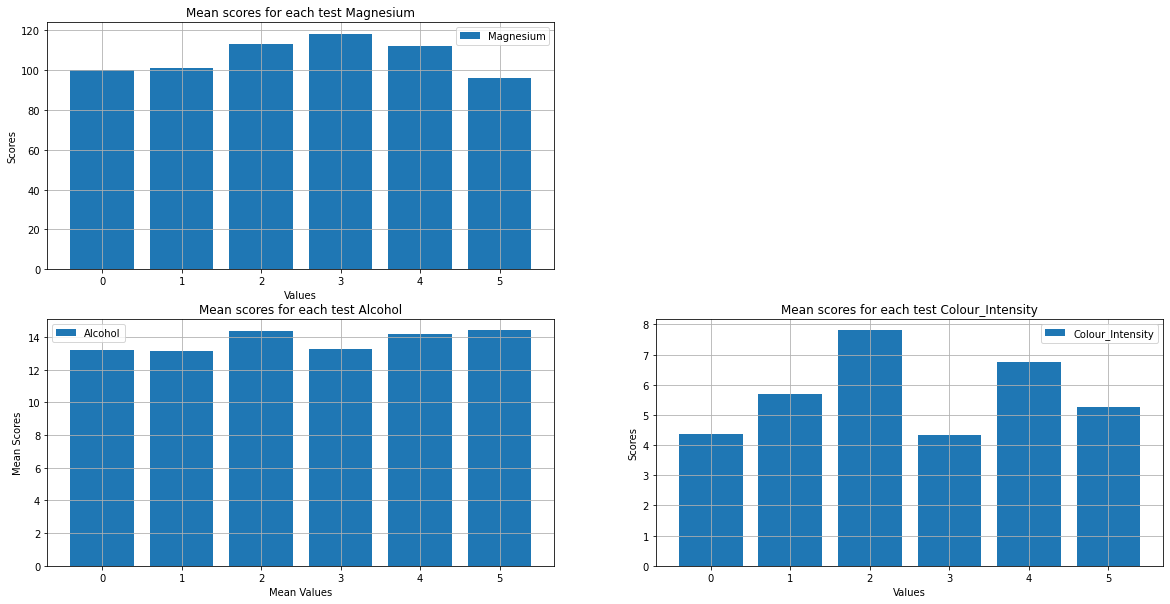

<Figure size 432x288 with 0 Axes>

In [29]:
# Récupération de l'objet figure et de l'objet axis
fig = plt.figure('myfigure', figsize=(20,10))

# Création du cadran Magnésium
ax = fig.add_subplot(221)
width = 0.25
# Création des valeurs de l'axe des abscisses
x_pos = list(range(len(df6)))
# Création du graphique, sur la deuxième variable
plt.bar(x_pos, df6.Magnesium[0:6], label = "Magnesium")
# Nommer les axes
ax.set_ylabel("Scores")
ax.set_xlabel("Values")
# Nommer le graphique
ax.set_title('Mean scores for each test Magnesium')
plt.grid()
plt.legend(['Magnesium'])

# Création du cadran Alcohol
ax = fig.add_subplot(223)
width = 0.25
x_pos = list(range(len(df6)))
# Création du graphique, sur la deuxième variable
plt.bar(x_pos, df6.Alcohol[0:6], label = "Alcohol")
ax.set_ylabel("Mean Scores")
ax.set_xlabel("Mean Values")
ax.set_title('Mean scores for each test Alcohol')
plt.grid()
plt.legend(['Alcohol'])

# Création du cadran Colour Intensity
ax = fig.add_subplot(224)
width = 0.25
# Création des valeurs de l'axe des abscisses
x_pos = list(range(len(df6)))
# Création du graphique, sur la deuxième variable
plt.bar(x_pos, df6.Colour_Intensity[0:6], label = "Colour_Intensity")
ax.set_ylabel("Scores")
ax.set_xlabel("Values")
ax.set_title('Mean scores for each test Colour_Intensity')
plt.grid()
plt.legend(['Colour_Intensity'])

plt.show()
plt.savefig("histo1.png")
